# Naive-Bayes Classifier

Using TfidVectorizer and SMOTE for Oversampling

## Data Processing

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('blooms_dataset.csv')

df['Text'] = df['Text'].str.replace(r'[^\w\s]+', '', regex=True)
df['Text'] = df['Text'].str.lower()

# Change categories into numbers
# Analyse - 0
# Apply - 1
# Create - 2
# Evaluate - 3
# Remember - 4
# Understand - 5

df['Label'] = pd.factorize(df.Label)[0]

# Blooms taxonomy categories
categories = ['Analyse', 'Apply', 'Create', 'Evaluate', 'Remember', 'Understand']

# split into training and test set
train, test = train_test_split(df, test_size=0.2, random_state=0)

##  Model Building and Analysis

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def generate_model(model):
    # Fit text to labels
    model.fit(train.Text, train.Label)

    # Generate blooms label on test set
    labels = model.predict(test.Text)

    # Heatmap of model
    mat = confusion_matrix(test.Label, labels)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
                , xticklabels=categories
                , yticklabels=categories)

    plt.xlabel('true label')
    plt.ylabel('predicted label')

    print(classification_report(test.Label, labels))
    # Model Accuracy, how often is the classifier correct?

    acc = accuracy_score(test.Label, labels)
    print("Accuracy:", acc)

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       124
           1       0.68      0.79      0.73       119
           2       0.81      0.86      0.83        79
           3       0.86      0.85      0.86       122
           4       0.86      0.77      0.81       324
           5       0.85      0.82      0.83       467

    accuracy                           0.82      1235
   macro avg       0.80      0.83      0.81      1235
weighted avg       0.82      0.82      0.82      1235

Accuracy: 0.8153846153846154


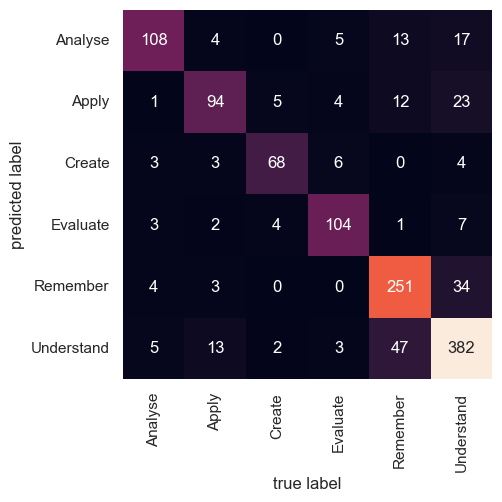

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

# Creating model based on Multinomial Naive Bayes with TfidfVectorizer and SMOTE for oversampling
model_NB = Pipeline([
   ('vect', TfidfVectorizer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', MultinomialNB())
])

generate_model(model_NB)

## Prediction Testing

In [6]:
category_dict = {0: 'Analyse', 1: 'Apply', 2: 'Create', 3: 'Evaluate', 4: 'Remember', 5: 'Understand'}

def predict_blooms(text, model):
    print(model.predict_proba([text]))
    blooms = model.predict([text])
    print("Predicted Class:", category_dict[blooms[0]])

In [7]:
task = "Develop new project ideas"

print("NAIVE BAYES PREDICTION:")
predict_blooms(task, model_NB)

NAIVE BAYES PREDICTION:
[[0.0556895  0.0468122  0.86424314 0.02293451 0.00697269 0.00334797]]
Predicted Class: Create
